<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/IntroTimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An Introduction to Time Series Analysis Examples

Created: 03/18/2023

Updated: 03/18/2023



In [2]:
from pandas.core.algorithms import SelectNSeries
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



In [3]:
# Read the monthly means CO2 levels dataset from Mauna Loa Observatory
# URL= https://gml.noaa.gov/ccgg/trends/data.html 

co2data = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/MaunaLoaCO2/co2_mm_mlo.csv"

# The file has Metadata first 56 lines
# The column names are in line 57
df_dist = pd.read_csv(co2data, header=0 , skiprows=56)


# Print the dataframe head.
df_dist.head()


,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [15]:
df_dist.tail()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
775,2022,10,2022.7917,415.78,419.13,30,0.27,0.10
776,2022,11,2022.8750,417.51,419.51,25,0.52,0.20
777,2022,12,2022.9583,418.95,419.64,24,0.50,0.20
778,2023,1,2023.0417,419.47,419.14,31,0.40,0.14
779,2023,2,2023.1250,420.41,419.49,25,0.64,0.25


In [28]:
# Print dataframe general info
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            780 non-null    int64  
 1   month           780 non-null    int64  
 2   decimal date    780 non-null    float64
 3   average         780 non-null    float64
 4   deseasonalized  780 non-null    float64
 5   ndays           780 non-null    int64  
 6   sdev            780 non-null    float64
 7   unc             780 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 48.9 KB


In [13]:
df_dist.describe()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,1990.166667,6.500000,1990.666037,357.901667,357.899833,18.948718,-2.136654,-0.103295
std,18.777405,3.454268,18.776733,30.733433,30.680013,12.061138,4.555639,0.514992
min,1958.000000,1.000000,1958.202700,312.430000,314.430000,-1.000000,-9.990000,-0.990000
25%,1974.000000,3.750000,1974.437475,329.892500,330.357500,1.250000,-9.990000,0.000000
50%,1990.000000,6.500000,1990.666650,354.185000,354.685000,25.000000,0.390000,0.150000
75%,2006.000000,9.250000,2006.895825,382.662500,382.705000,28.000000,0.560000,0.210000
max,2023.000000,12.000000,2023.125000,420.990000,419.640000,31.000000,1.310000,0.580000


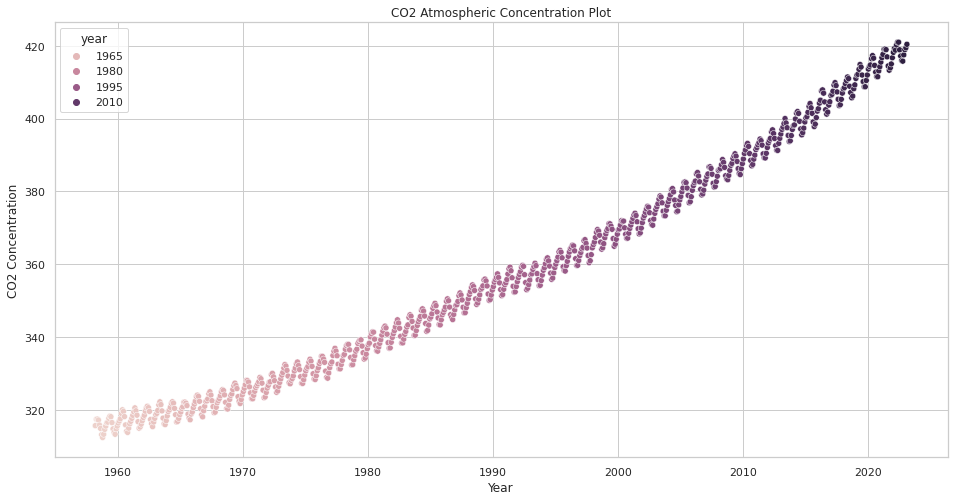

In [4]:
# Seaborn 
# Show Trend and seasonality of a time series

#define figure size and Seaborn style
sns.set(rc={"figure.figsize":(16, 8)}) #width=12, height=8
sns.set_style("whitegrid")

# Scatterplot
sns.scatterplot(data=df_dist, x="decimal date", y="average", hue="year").set(
    xlabel="Year", ylabel="CO2 Concentration", title="CO2 Atmospheric Concentration Plot");
    

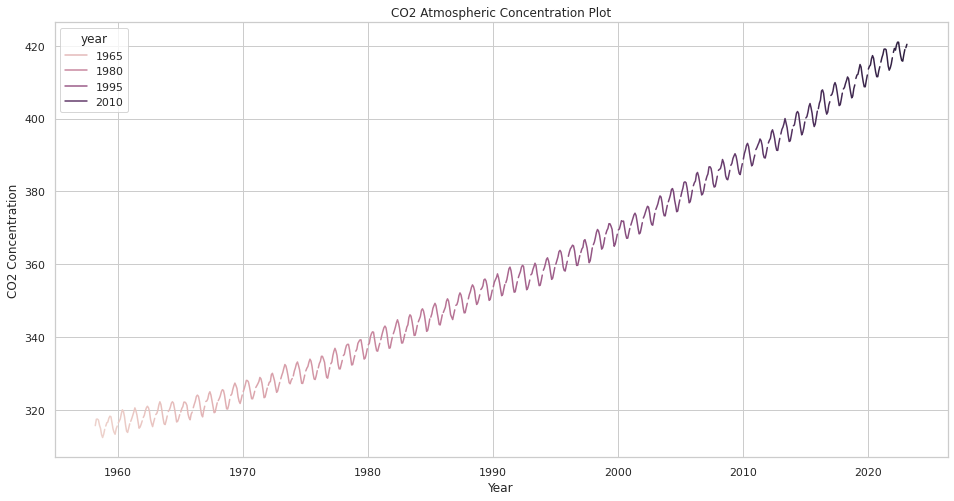

In [5]:
# Lineplot
sns.lineplot(data=df_dist, x="decimal date", y="average", hue="year").set(
    xlabel="Year", ylabel="CO2 Concentration", title="CO2 Atmospheric Concentration Plot");
    

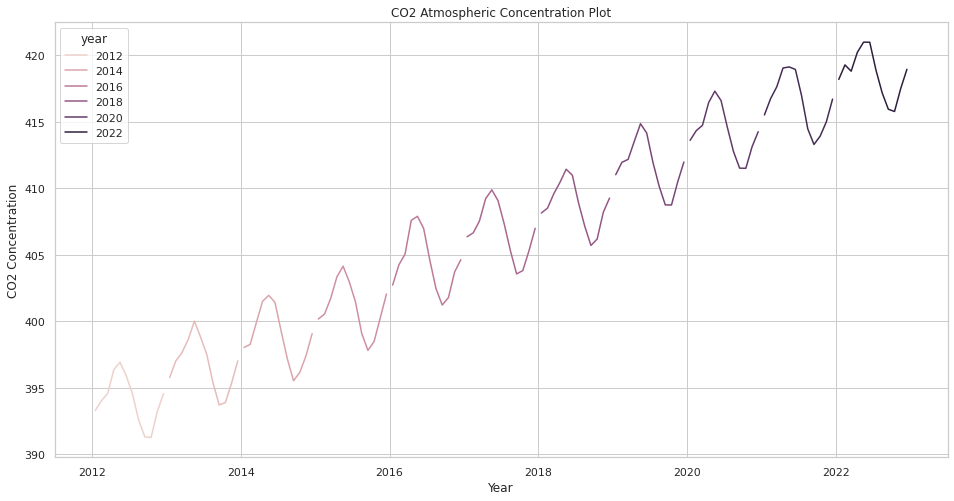

In [16]:
# Lineplot of a selected range of years

df_range = df_dist[(df_dist["year"] >= 2012) & (df_dist["year"] <= 2022)]
sns.lineplot(data=df_range, x="decimal date", y="average", hue="year").set(
    xlabel="Year", ylabel="CO2 Concentration", title="CO2 Atmospheric Concentration Plot");

